# Simple Plot of Renalysis for a location

In [1]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
import metpy.calc as mpy
import datetime as dt
from metpy.units import units
import xarray as xr
from pylab import *

In [2]:


## SIMPLE PLOTS ##

pdir = "/glade/work/rneale/data/ERAI/6hrly/"
#cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100a','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101a']
#cnames = ['CAM6','CAM6-noconv','CAM5','CAM5-noconv']

yrmon = '201706'

cases = ['V.6hrly.201706']
cnames = ['CAM6']

vnames = ['U','V']
vscale = [1.,1.]


#vname1d = 'SWCF' ; vscale1d = 1.
#vname1d = 'CLDLOW' ; vscale1d = 1.


FileNotFoundError: [Errno 2] No such file or directory: b'/glade/work/rneale/data/ERAI/6hrly/U.6hrly.201706.nc'

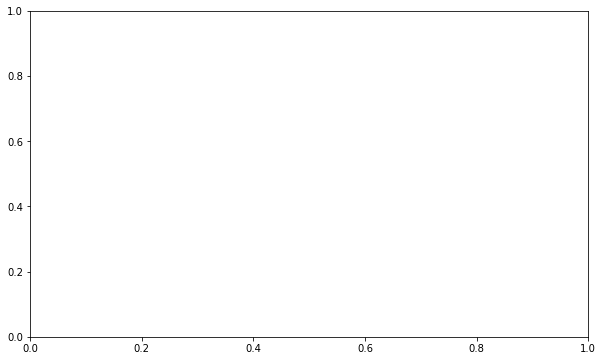

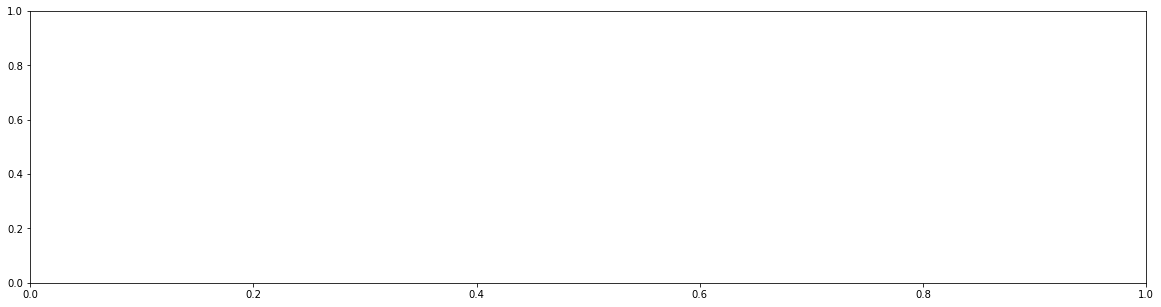

In [3]:
plt1av, ax1av = mp.subplots(figsize=(10, 6))

for iv in range(0,len(vnames)):
   
    vname = vnames[iv]

    plt1, ax1 = mp.subplots(figsize=(20, 5))
    
    fname_in = pdir+vnames[iv]+'.6hrly.'+yrmon+'.nc'
    file_in = xr.open_dataset(fname_in)
    print('File read in -> '+fname_in)
    print(file_in)
#    pvar = file_in[vname][:,10::,100,100]
    pvar = file_in[vname]
    pvar = pvar*vscale[iv]
    
    dlev = (pvar.max().values-pvar.min().values)/20

    if ic == 0: plevels = np.arange(pvar.min().values,pvar.max().values,dlev,dtype=np.float)
    
    ax1.set_title(vname)
    ax1.set_ylabel('Pressure (mb)') 
    ax1.set_xlabel("Time")  

    plt1 = mp.contourf(pvar.time.values,pvar.lev,pvar,levels=plevels,cmap='Purples') 
    mp.colorbar(plt1, extend='both')
    plt1 = mp.contour(pvar.time.values,pvar.lev,pvar,levels=plevels,colors='black',linewidths=0.25) 
    ax1.invert_yaxis()  
    ax1.set_title(cnames[ic]+' - '+vname)

    pvarm = pvar.mean(axis=1)
    ax1av.plot(pvarm,pvarm.lev)
    
    
#ax1av.set_ylim(ax1.get_ylim()[::-1])
ax1av.set_title(vname)            
ax1av.invert_yaxis()  
plt1av.legend(cnames)
plt1av.savefig('scam_'+vname+'.png', dpi=300)
 
    
## 1d timeseries ##
    
#plt2, ax2 = mp.subplots(figsize=(20, 5))

#print(" -- 1d field --> "+vname1d)

#for ic1 in range(0,len(cnames)):
    
#    scam_in = xr.open_dataset(pdir+cases[ic1]+csuf)
#    print('File read in -> '+cases[ic1])

#    pvar = scam_in[vname1d][:,0,0]
#    pvar[pvar == 0.] = np.nan
    
# Interpolate for radiation variable (missing non-rad tsteps)
    
#    pvar = pvar*vscale1d

#    ax2.plot(pvar.time.values,pvar,'-o',markersize = 5)
#    print(pvar.mean(axis=0).values)
    
#ax2.set_title(vname1d)   
#plt2.legend(cnames)
#plt2.savefig('scam_'+vname1d+'.png', dpi=300)  
    
    